<div dir="rtl">
<h4>نام: سارا رضایی منش</h4>
 
<h4>شماره دانشجویی: ۸۱۰۱۹۸۵۷۶</h4>
<h1 style="color: #cf133e; font-weight: 600;">تمرین کامپیوتری شماره چهار</h1>
<h3>هدف پروژه: آشنایی با روش های یادگیری ماشین به وسیله کتابخانه sickit-Learn</h3>
<h5 style="line-height: 20pt;">توضیح کلی پروژه: در این پروژه ابتدا در مرحله پیش پردازش ، با استخراج ویژگی ها و تاثیر آنها بر دقت مدل آشنا شدیم. سپس در مرحله بعد با استفاده از sklearn به ساختن مدل با decision tree پرداختیم و هایپر پارامتر های آن را با استفاده از تابع gridSearchCV بهینه کنیم. در این مرحله همچنین تاثیر مقادیر مختلف هایپر پارامتر ها را بر دقت مدل مشاهده کردیم. در فاز بعد با استفاده از روش ensemble به نام random forest مدل جدیدی ساختیم و هایپر پارامتر های آن را هم بهینه کردیم. در پایان عملکرد این دو روش را با هم مقایسه کردیم.</h5>
</div>

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">فاز صفر: بررسی داده ها</h3>
    <h4 dir="rtl" style="font-weight: 600;">1.</h4>
</div>

In [219]:
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

ds = pd.read_csv('./dataset.csv')
ds.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [220]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


<h4 dir="rtl" style="font-weight: 600;">2.</h4>

In [221]:
ds.isnull().sum()*100/len(ds)

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">فاز یک:پیش پردازش</h3>
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">1.</h4>
    <h5 style="line-height: 20pt;">شیوه ۱: در صورتیکه درصد کمی از داده ها گمشده باشند یا اهمیت زیادی نداشته باشند، می توان مشاهدات مربوط به آنها را نادیده گرفت. </h5>
    <h5 style="line-height: 20pt;">شیوه ۲: پر کردن مقادیر گمشده با مد</h5>
    <h5 style="line-height: 20pt;">از آنجایی که داده های گمشده ما با توجه به اطلاعات بالا، همه از نوع categorical هستند، پر کردن آنها با شیوه های داده های عددی(پر کردن با میانگین، رگرسیون و ... راه حل مناسبی نیست. از بین دو شیوه ذکر شده، شیوه دوم به این علت که داده های گمشده به خصوص در بخش country نزدیک یک چهارم داده ها را تشکیل می دهند مناسبتر است. نادیده گرفتن چنین بخش بزرگی از داده ها ممکن است به استنتاج های انجام شده از این دیتاست آسیب بزند. </h5>
</div>

In [222]:
ds = ds.apply(lambda x:x.fillna(x.value_counts().index[0]))
ds.isnull().sum()

type            0
title           0
cast            0
country         0
release_year    0
listed_in       0
description     0
dtype: int64

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">2.</h4>
    <h5 style="line-height: 20pt;">normalization و standardization از معروفترین شیوه های scaling هستند. scaling به این علت انجام می شود که ممکن است بازه ای که مقادیر ستونهای دیتاست در آن قرار می گیرند، بسیار متفاوت باشند. به عنوان مثال مقادیر موجود در یک ستون خیلی بزرگتر از مقادیر موجود در ستون دیگر باشند. این تفاوت در برخی شرایط باعث می شود، نتایج ما به سمت داده های بزرگتر بایاس داشته باشد. با استفاده از scaling همه داده ها را در یک مقیاس قرار می دهیم. طوریکه بازه های آنها به هم نزدیک باشد.</h5>
    <h5 style="line-height: 20pt;">Normalization</h5>
    <h5 style="line-height: 20pt;">داده ها را طوری تغییر می دهد که بین صفر و یک قرار بگیرند و با استفاده از فرمول زیر انجام می شود:</h5>
    <img src="./images/normalization.png" />
    <h5 style="line-height: 20pt;">Standardization</h5>
    <h5 style="line-height: 20pt;">داده ها را طوری تغییر می دهد که میانگین صفر و انحراف معیار یک داشته باشند و با استفاده از فرمول زیر انجام می شود. </h5>
    <img src="./images/standardization.png" />
    <h5 style="line-height: 20pt;">به صورت کلی، در مواردی که داده ها، شامل مقادیری هستند که نسبت به داده های دیگر خیلی کوچک یا خیلی بزرگ هستند، بهتر است از noramalization استفاده نکنیم. چراکه وابستگی زیادی به کوچکترین و بزرگترین مقدار دارد و نتیجه خوبی نخواهد داد. اما در شرایطی که توزیع داده ها برای ما مشخص نیست یا می دانیم توزیع به صورت نرمال یا گاوسی نیست بهتر است از این شیوه استفاده کنیم. این روش در الگوریتم هایی که توزیع خاصی برای داده ها در نظر نمی گیرند به کار می آید. مانند neural networks و k_nearest eighbors.</h5>
    <h5 style="line-height: 20pt;">در مواردی که توزیع داده ها به صورت نرمال یا گاوسی است، استفاده از standardization مناسب است. چرا که این شیوه با رساندن میانگین به صفر و انجراف معیار به یک، در واقع توزیع داده ها را به صورت نرمال در می آورد و اگر این توزیع از ابتدا نرمال یا گاوسی باشد، بی تغییر می ماند. ای شیوه هیچ بازه ای برای داده ها تعیین نمی کند و به همین علت داده های پرت بی تغییر باقی می مانند. </h5>
    <h5 style="line-height: 20pt;">می توان نتیجه گرفت که هیچ کدام از این دو متد برتری کامل نسبت به هم ندارند و اینکه کدام الگوریتم بهتر است به مساله و الگوریتم ماشین لرنینگ مورد استفاده بستگی دارد. </h5>
</div>

In [223]:
numeric = ds.select_dtypes(include=['int64', 'float64']).columns
ds[numeric] =(ds[numeric]-ds[numeric].min())/(ds[numeric].max()-ds[numeric].min())

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 700;">3.</h4>
    <h5 style="line-height: 20pt;">روش های تبدیل داده های کتگوریکال به داده های عددی به صورت زیر می باشد:</h5>
    <h5 style="line-height: 20pt;">Label Encoding:</h5>
    <h5 style="line-height: 20pt;">در این روش به هر مقدار یکتا در ستون داده ها، یک مقدار عددی نسبت می دهیم.به عنوان مثال در ستون country به ازای همه united states ها عدد ۱، به ازای inidia ها عدد ۲ و نسبت می دهیم و به همین ترتیب باقی کشور ها را هم مقداردهی می کنیم.</h5>
    <h5 style="line-height: 20pt;">One Hot Encoding:</h5>
    <h5 style="line-height: 20pt;">در این روش به ازای هر مقدار یکتا یک فیچر جدید در نظر می گیریم و برای همه داده ها با مقادیر یک یا صفر مشخص می کنیم این فیچر را شامل می شوند یا خیر. به عنوان مثال در ستون country برای مقدار united states یک ستون جدید اضافه می کنیم و سپس برای همه فیلم ها در صورتی که در ایالات متحده ساخته شده باشند در آن ستون مقدار یک و در غیر اینصورت مقدار صفر قرار می دهیم.</h5>
    <h5 style="line-height: 20pt;">در این پروژه بهتر است از شیوه label encoding استفاده شود. چرا که مقادیر ستون هایی مانند country و cast می توانند مقادیر بسیار متفاوتی را بگیرند و فرآیند اختصاص دادن ستون برای همه آنها و پرکردن آنها با صفر و یک هم خود کار هزینه بری است و هم در آینده بررسی چنین تعداد فیچر های زیادی بسیار برای الگوریتم بکارگرفته شده برای ساختن درخت زمانبر خواهد بود. اضافه بر این روابط عددی به وجود آمده در اثر label encoding  در کارکرد الگوریتم های به کار گرفته شده در این پروژه تاثیری ندارند.</h5>
</div>

In [224]:
ds['country'] = ds[['country']].apply(preprocessing.LabelEncoder().fit_transform)
ds['type'] = ds[['type']].apply(preprocessing.LabelEncoder().fit_transform)
ds.head()

,type,title,cast,country,release_year,listed_in,description
0,0,Dick Johnson Is Dead,David Attenborough,608,0.989583,Documentaries,"As her father nears the end of his life, filmm..."
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,1.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,1,Jailbirds New Orleans,David Attenborough,608,1.000000,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">4.</h4>
    <h5 style="line-height: 20pt;">روش های استفاده از ستون listed_in به صورت زیر می باشد:</h5>
    <h5 style="line-height: 20pt;">۱. برای فیلم هایی که بیشتر از یک ژانر دارند،از میان ژانرهایشان ژانری را انتخاب کنیم که بیشترین تکرار را درمیان فیلم های دیگر دارد. یا یکی از ژانر ها را به صورت تصادفی انتخاب کنیم.</h5>
    <h5 style="line-height: 20pt;">۲. به ازای هر ژانر یک سطر اضافه کنیم. به صورتی که هر همه اطلاعات فیلم حاوی چند ژانر در آن تکرار شود و در هر سطر جدید فقط یکی از ژانر های فیلم گذاشته شود.</h5>
    <h5 style="line-height: 20pt;">۳. در این دیتاست هر فیلم حداکثر سه ژانر دارد. می توان سه ستون اضافه ساخت و هر کدام از ژانر ها را در هر یک از سه ستون قرار داد. در صورتی که فیلمی کمتر از سه ژانر داشته باشد، یک یا دو ستون از ژانر ها null می شوند.</h5>
    <h5 style="line-height: 20pt;">روش انتخابی من روش سوم است. در روش اول ممکن است بسیاری از داده های مهم از بین برود و در روش دوم هم تاثیر یک فیلم در تصمیم گیری بیشتر می شود.</h5>
    <h5 style="line-height: 20pt;">در قطعه کد زیر ابتدا هر رشته در ستون listed in به یک آرایه از ژانر ها شکسته می شود و سپس سه ستون genre1 و genre2 و genre3 به ادیتاست اضافه می شوند. در پایان ستون listed_in حذف می شود.</h5>
</div>

In [225]:
ds['listed_in'] = ds['listed_in'].map(lambda string: string.split(', ') + ['']*(3-len(string.split(','))))
generes = [ds['listed_in'].map(lambda arr: arr[i]) for i in range(3)]
ds['genre1'], ds['genre2'], ds['genre3']  = generes[0], generes[1],  generes[2]
ds = ds.drop(columns='listed_in', axis=1)

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">استخراج ویژگی از متن</h4>
    <h5 style="line-height: 20pt;">استخراج ویژگی از متن</h5>
    <h5 style="line-height: 20pt;">با استفاده از TfidVectorizer برای title و description مجموعا ۵۰ ویژگی و برای actors ۱۰ ویژگی استخراج می کنیم. دیتافریم های بدست آمده را با دیتافریم اصلی concatenate می کنیم و داخل دیتافریم جدیدی به نام ds_vc ذخیره می کنیم. همچنین ستون هایی که ویژگی ها از آنها استخراج شده اند را حذف می کنیم. نتایج به صورت زیر است:</h5>
</div>

In [226]:
def countVectorize(n, arr, ngf):
    vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(ngf, 2), stop_words='english', min_df = n)  
    vectorized = vectorizer.fit_transform(arr)
    a = pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, 1+len(arr))],columns=vectorizer.get_feature_names_out())
    return a.reset_index().drop(columns = 'index', axis = 1)

ds_vc = pd.concat([ds, countVectorize(223, ds['title'] + ds['description'], 1)], axis = 1)
ds_vc = ds_vc.drop(columns = ['title', 'description'], axis = 1)

ds_vc = pd.concat([ds_vc, countVectorize(30, ds['cast'], 2)], axis = 1)
ds_vc = ds_vc.drop(columns = ['cast'], axis = 1)
ds_vc.head()

,type,country,release_year,genre1,genre2,genre3,best,boy,city,comedy,...,anupam kher,david attenborough,juan pablo,julie tejwani,naseeruddin shah,rukh khan,rupa bhimani,shah rukh,takahiro sakurai,yuki kaji
0,0,608,0.989583,Documentaries,,,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,430,1.000000,International TV Shows,TV Dramas,TV Mysteries,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,608,1.000000,Crime TV Shows,International TV Shows,TV Action & Adventure,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,608,1.000000,Docuseries,Reality TV,,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,254,1.000000,International TV Shows,Romantic TV Shows,TV Comedies,0.0,0.0,0.667044,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir="rtl">
    <h5 style="line-height: 20pt;">تحلیل نتایج</h5>
    <h5 style="line-height: 20pt;">مشاهده می شود که برای کلماتی که تکرار بیشتری دارند ارزش کمتری قرار داده شده است. من به این دلیل که کلماتی مانند استاپ ورد ها را حذف کرده بودم، معیار انتخاب را بر اساس تعداد تکرار قرار دادم. در جدول می بینیم که مثلا کلمه town که تکرار زیادی در توضیحات دارد نسبت به david attaborough امتیاز کمتری گرفته است.</h5>
    <h5 style="line-height: 20pt;">توجه شود که با استفاده از پارامتر ngram در نام بازیگران هم اسم هم فامیلی بازیگر در هنگام شمردن تعداد تکرار ها تاثیر داده شده است.</h5>
    <h5 style="line-height: 20pt;">استخراج ویژگی بیشتر از حد مشخصی ممکن است باعث overfitting بشود. وقتی که تعداد کلمات استخراجی را از ۶۰ به حدود ۳۰۰ کلمه رساندم، accuracy پایینتری نتیجه شد. در واقع با اینکار مدل خود را بیش از اندازه به کلمات موجود در داده های تستس وابسته کردیم که مخصوصا در مورد description و title ممکن است مقادیر خیلی متنوعی را بگیرند و تکرار های کمتر است ممکن است کاملا به صورت شانسی در این دیتاست تکرار بیشتری داشته باشند و حامل نتایج خاصی نباشند. بهتر است مقدار مینیمم تکرار به صورتی باشد که تا اندازه ای کلمه را معنی دار کند.</h5>
</div>

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">بررسی روابط بین ویژگی ها</h4>
    <h5 style="line-height: 20pt;">نمودار بدست آمده در این بخش به ما نشان می دهد در صورت دانستن هر کدام از ویژگی ها، چه مقدار اطلاعات در مورد ویژگی type بدست می آوریم. در ساختن درخت تصمیم در هر مرحله، ویژگی را انتخاب می کنیم که در آن مرحله information gain بیشتری داشته باشد. یعنی با انتخاب آن ویژگی، اطلاعات بیشتری در مقدار ستون هدف خود بدست بیاوریم. به عنوان مثال در این سطح مشخص است که genre1 بیشترین اطلاعات را به ما در مورد نوع فیلم می دهد. پس در اولین مرحله بهتر است درخت را بر اساس آن تقسیم کرده و سپس به بررسی ویژگی های دیگر بپردازیم. هر چه information gain بیشتر باشد، کاهش آنتروپی یا diversity در مقدار متغیر تصادفی بیشتر خواهد بود که مطلوب است.</h5>
</div>

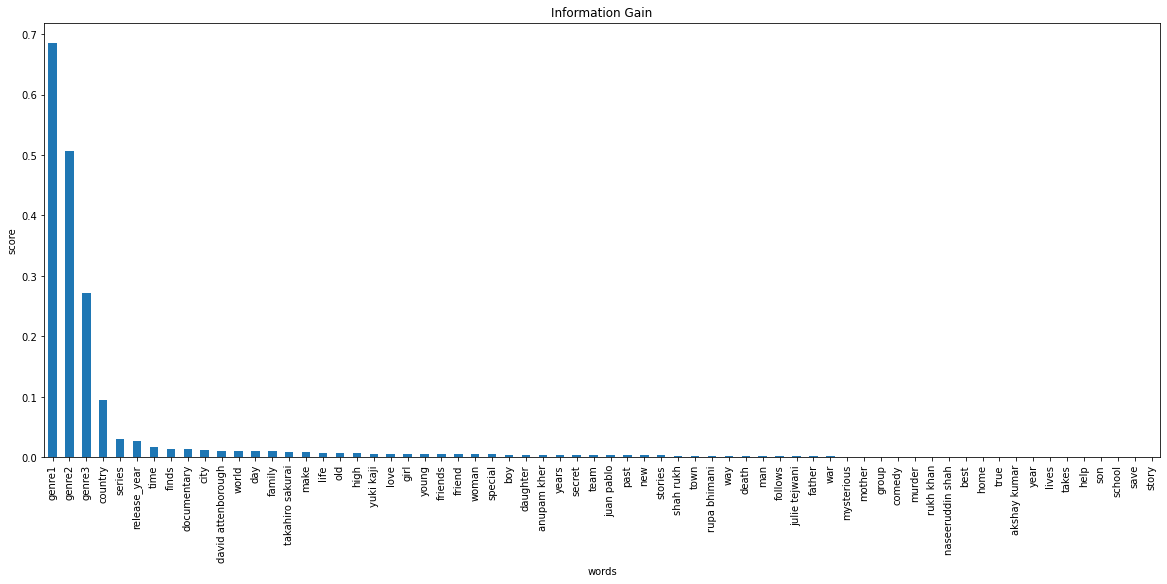

In [227]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

ds_vc['genre1'] = ds_vc[['genre1']].apply(preprocessing.LabelEncoder().fit_transform)
ds_vc['genre2'] = ds_vc[['genre2']].apply(preprocessing.LabelEncoder().fit_transform)
ds_vc['genre3'] = ds_vc[['genre3']].apply(preprocessing.LabelEncoder().fit_transform)
target = ds_vc['type']
ds_vc = ds_vc.drop(columns = ['type'], axis=1) 
mutual_info = pd.Series(mutual_info_classif(ds_vc, target))
mutual_info.index = ds_vc.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.xlabel('words')
plt.ylabel('score')
plt.title('Information Gain')
plt.show()

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">فاز دو:پیش بینی هدف و بهینه سازی مدل ها</h3>
</div>

Accuracy: 0.9896021699819169


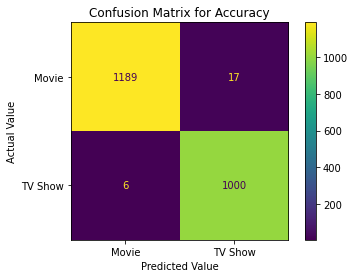

col_0,0,1
type,,
0,1189,17
1,6,1000


In [305]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

def getConfusion(ts,df):
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = ts, random_state=1)
    clf = DecisionTreeClassifier().fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    a = confusion_matrix(y_test, y_pred)
    cmd_obj = ConfusionMatrixDisplay(a, display_labels=['Movie', 'TV Show'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                title='Confusion Matrix for Accuracy', 
                xlabel='Predicted Value', 
                ylabel='Actual Value')
    plt.show()
    return pd.crosstab(y_test, y_pred)

getConfusion(0.2, ds_vc)

Accuracy: 0.9819819819819819


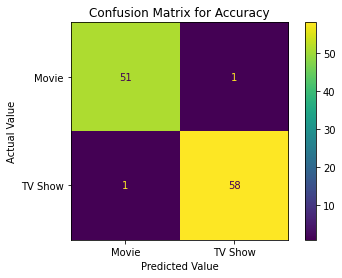

col_0,0,1
type,,
0,51,1
1,1,58


In [303]:
getConfusion(0.01, ds_vc)

Accuracy: 0.9758137432188065


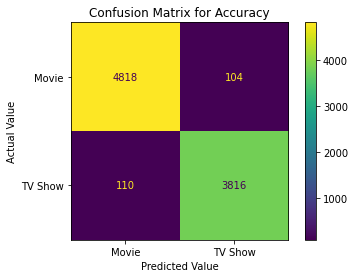

col_0,0,1
type,,
0,4818,104
1,110,3816


In [304]:
getConfusion(0.8, ds_vc)

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">بررسی نتایج accuracy:</h4>
    <h5 style="line-height: 20pt;">از آنجایی که تغییرات در accuracy با استفاده از مقادیر داده شده در صورت سوال یک خیلی واضح نبودند، کمی آنها را تغییر دادم.</h5>
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">1.</h4>
    <h5 style="line-height: 20pt;">هر چه سایز داده های آموزشی کمتر باشد، variation در آنها کمتر است و به همین علت، پراکندگی در تخمین پارامتر بیشتر خواهد بود و هر چه بیشتر باشد، پراکندگی در اندازه گیری عملکرد مدل بدست آمده بیشتر خواهد شد.</h5>
    <h5 style="line-height: 20pt;">نسبت 80:20 تقسیم کردم. به صورت کلی برای داده های بزرگ، نسبت تقسیم تفاوت زیادی ایجاد نمی کند. همانطور که از نتایج مشخص است، با تغییر درصد داده تست از 20 درصد به یک درصد، accuracy تنها یک صدم درصد تغییر کرده است. اما به صورت کلی باید داده تست درصدکمتری از کل داده ها را نسبت به داده train  به خود اختصاص دهد. چراکه در غیر اینصورت، پراکندگی داده ها به اندازه ای نیست که بتوان بر اساس آنها تصمیم گرفت و پراکندگی تست خیلی بیشتر خواهد بود..</h5>
    <h5 style="line-height: 20pt;">در هر دو مورد accuracy کاهش یافته است. در موردی که داده های تست بسیار کم هستند، به علت سایز بزرگ مجموعه داده های آموزشی تفاوت زیادی مشاهده نمی کنیم اما به صورت کلی می توان گفت در این حالت underfitting رخ می دهد. که حالتی است که مدل ما نمی تواند به خوبی رابطه میان ورودی ها و خروجی ها را تشخیص دهد. این اتفاق به این دلیل می افتد که میزان  variation در داده های آموزشی زیاد می شود و مدلسازی سخت تر می شود.</h5>
    <h5 style="line-height: 20pt;">در موردی که داده های آموزشی بسیار کم هستند، از آنجایی که variation در آنها کم است،‌overfitting اتفاق می افتد. یعنی مدل ما، داده آموزشی را با دقت بالا تخمین می زند اما روی داده تست عملکرد خوبی ندارد. هنگامی که داده های ما variation کافی را ندارند، ساخت مدل برای آنها ممکن است ساده تر باشد اما در عین حال ممکن است حالات زیادی در داده های ما باشند که در داده های آموزشی نیامده باشند و اطلاعات مربوط به آنها رد نظر گرفته نشده باشد. در واقع مدل داده قدرت عمومی سازی خود را از دست می دهد.</h5>
</div>

In [273]:
from sklearn.model_selection import GridSearchCV
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(ds_vc, target, test_size = 0.2, random_state=1)
clf = GridSearchCV(DecisionTreeClassifier(),
                         {'min_samples_split': np.arange(2,12,2) ,'max_depth': [10, 20, 30, 1000, 100]},
                          cv = 5, return_train_score=False, scoring= 'accuracy')
clf = clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033512,0.004211,0.002780,0.000515,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.988136,0.990960,0.992651,0.990955,0.992651,0.991071,0.001651,22
1,0.029763,0.001704,0.002507,0.000259,10,4,"{'max_depth': 10, 'min_samples_split': 4}",0.988136,0.992090,0.993217,0.991521,0.992651,0.991523,0.001785,13
2,0.031640,0.003207,0.002393,0.000164,10,6,"{'max_depth': 10, 'min_samples_split': 6}",0.988136,0.992655,0.993217,0.990955,0.992086,0.991410,0.001800,17
3,0.029473,0.002351,0.002783,0.000479,10,8,"{'max_depth': 10, 'min_samples_split': 8}",0.988136,0.993220,0.993217,0.990955,0.993217,0.991749,0.002008,6
4,0.038788,0.007241,0.003071,0.000593,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.987571,0.993785,0.993217,0.990955,0.991521,0.991410,0.002185,18


In [274]:
accuracy = clf.best_score_
print(accuracy)
clf.best_params_

0.9920877766173873


{'max_depth': 100, 'min_samples_split': 8}

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">بررسی نتایج searchGridCV:</h4>
    <h5 style="line-height: 20pt;">در قطعه کد بالا با استفاده از searchGridCV مقادیر مختلفی که می توان به عنوان max_depth و min_sample_split داد را با هم امتحان کردیم و بهترین آنها را استخراج کردیم. همانطور  که مشاهده می شود مقدار accuracy بدست آمده از بهترین accuracy مراحل قبل بیشتر است. بخشی از نمودار مقدار accuracy به ازای مقادیر دیگر هایپر پارامتر ها نیز در جدول بالا قابل مشاهده است. به صورت کلی max_depth مشخص می کند فرایند ساخت درخت تا چه عمقی ادامه پیدا کند و min_samples_split نشان می دهد یک نود باید حداقل چند سمپل در خود داشته باشد تا بتوان آن را تقسیم کرد. هر چه این مقدار بیشتر باشد طبیعتا عمق درخت نیز کمتر می شود. در صورتی که عمق درخت خیلی کم باشد underfitting و در غیر اینصورت overfitting اتفاق می افتد. برای min_sampels_split نیز اگر مقدار آن بسیار بزرگ باشد underfitting و اگر خیلی کوچک باشد overfittig رخ می دهد.</h5>
</div>

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">2.</h4>
    <h5 style="line-height: 20pt;">قطعه کد زیر، مقدار accuracy رابرای مقادیر مختلف max_depth محاسبه می کند و confusion matrix آنها را نیز رسم می کند.</h5>
</div>

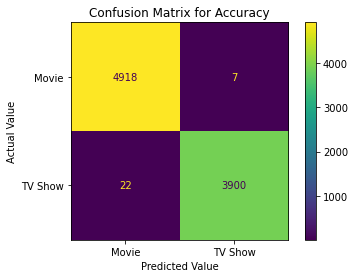

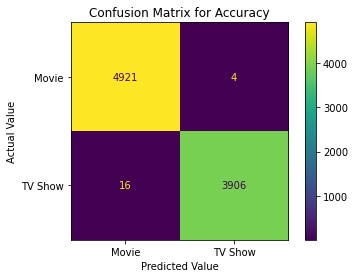

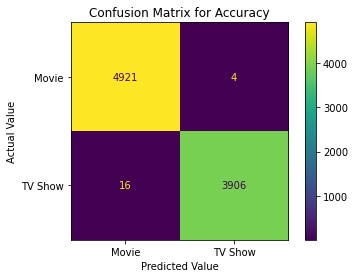

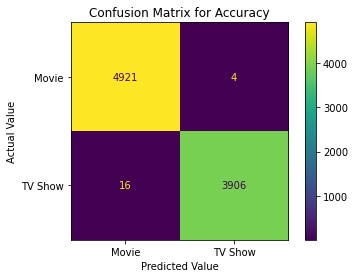

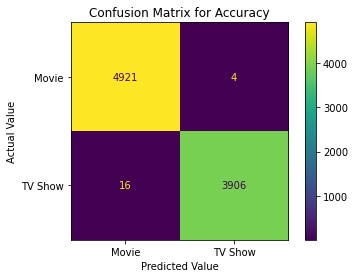

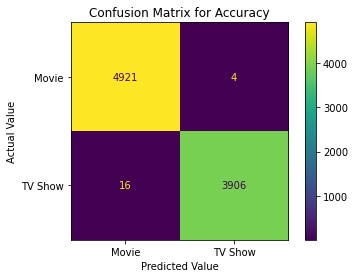

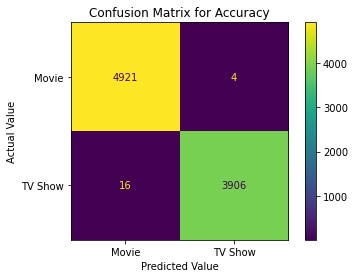

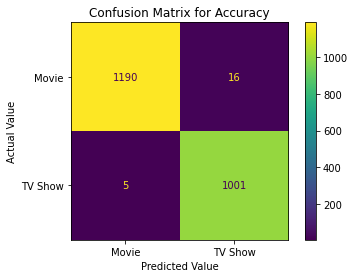

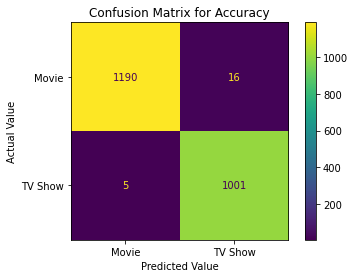

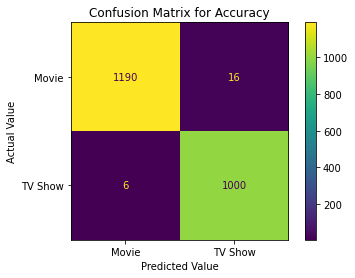

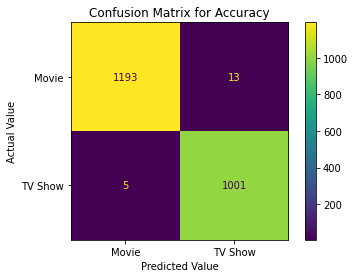

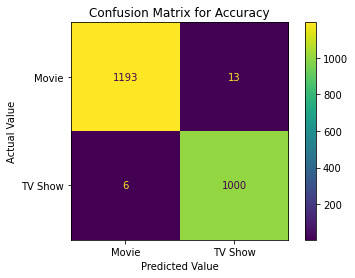

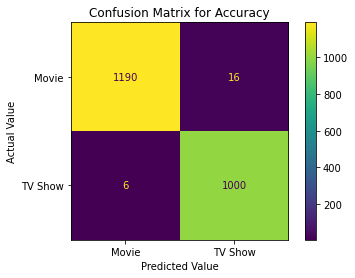

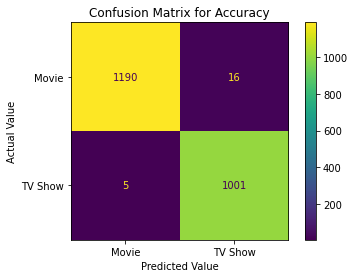

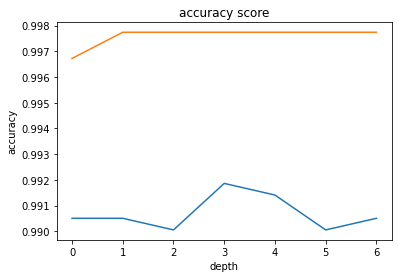

In [276]:
X_train, X_test, y_train, y_test = train_test_split(ds_vc, target, test_size = 0.2, random_state=1)
def getAccuracyWP(md, pred_acc, pred_param):
    clf = DecisionTreeClassifier(max_depth=md, min_samples_split=8).fit(X_train,y_train)
    y_pred = clf.predict(pred_param)
    a = confusion_matrix(pred_acc, y_pred)
    cmd_obj = ConfusionMatrixDisplay(a, display_labels=['Movie', 'TV Show'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                title='Confusion Matrix for Accuracy', 
                xlabel='Predicted Value', 
                ylabel='Actual Value')
    plt.show()
    return metrics.accuracy_score(pred_acc, y_pred)


depths = [10, 20, 50, 100, 1000, 5000, 100000]
accz_test = [getAccuracyWP(depth, y_train, X_train) for depth in depths]
accz_train = [getAccuracyWP(depth, y_test, X_test) for depth in depths]
plt.plot(accz_train, label='train score')
plt.plot(accz_test, label='test score')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy score')
plt.show()

In [234]:
print(accz_test)
print(accz_train)

[0.9975132813383067, 0.998869673335594, 0.998869673335594, 0.998869673335594, 0.998869673335594, 0.998869673335594, 0.998869673335594]
[0.9900542495479204, 0.9896021699819169, 0.9914104882459313, 0.9914104882459313, 0.9914104882459313, 0.9909584086799277, 0.9909584086799277]


<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">بررسی نتایج accuracy به ازای depth های مختلف:</h4>
    <h5 style="line-height: 20pt;">مشاهده می شود که در ابتدا با افزایش مقدار max_depth، دقت هم برای داده های آموزشی و هم برای داده های تست تقریبا افزایش پیدا می کنند. و بیشترین مقدار در max_depth = 100(همانطور که در gridSearchCV هم براورد شده بود) به دست می آید. اما با افزایش عمق از 100، دقت برای داده آموزشی ثابت مانده و برای داده های تست کاهش می یابد. در واقع با افزایش عمق ویژگی های بیشتری در نظر گرفته می شوند و از یک حدی بیشتر overfitting اتفاق می افتد. همچنین اگر عمقدرخت خیلی کم باشد نیز underfitting رخ می دهد و ویژگی ها به صورت کافی در نظر گرفته نمی شوند.</h5>
</div>

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">فاز سه:پیش بینی با استفاده از یادگیری عمومی</h3>
    <h5 style="line-height: 20pt;">علاوه بر پارامتر های مربوط به decision tree، هایپر پارامتر هایی هم هستند که مخصوص random forst ها هستند که دو تا از آنها در زیر بررسی شده اند:</h5>
    <h5 style="line-height: 20pt;">n_estimators</h5>
    <h5 style="line-height: 20pt;">این هایپرپارامتر مشخص می کند که در مدل random forst چند درخت ساخته شود. بر خلاف هایپرپارامتر های قبلی، این هایپر پارامتر هر چه بیشتر باشد، دقت بیشتری را به ما می دهد و تنها عیب آن این است که زمان بیشتری مصرف می کند و از یک حدی به بعد نیز دقت یا ثابت می شود و یا تغییرات خیلی ناچیزی می کند. شکل زیر تغییرات میزان accuracy را با تغییرات این هایپرپارامتر نشان می دهد.</h5>
    <img src="./images/n_estimators.png" style="max-height: 300px">
    <h5 style="line-height: 20pt;">از آنجایی که کلا در این پارامتر تنها چیزی که در ازای بیشتر شدن آن از دست می دهیم زمان است، و دقت همواره بیشتر می شود، مقادیر مختلف این پارامتر را امتحان نمی کنیم.</h5>
    <h5 style="line-height: 20pt;">max_features</h5>
    <h5 style="line-height: 20pt;">این هایپر پارامتر مشخص می کند که حداکثر چه تعداد از ویژگی ها به هر درخت داده شود. در صورتی که این پارامتر از یک حد مشخص بیشتر شود، overfitting رخ می دهد. شکل زیر نشاندهنده تغییرات مقدار accuracy با تغییرات هایپر پارامتر max_features است.</h5>
    <img src="./images/max_features.png" style="max-height: 300px">
    <h5 style="line-height: 20pt;">از آنجایی که مقدار پیشفرض این هایپر پارامتر عموما به بهترین مقدار آن نزدیک است، مقادیر مختلف آن را امتحان نمی کنیم.</h5>
</div>

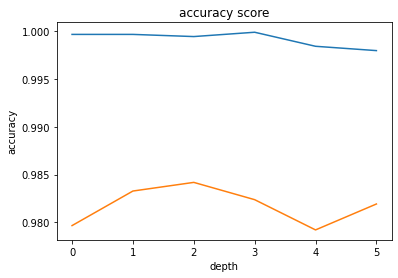

In [299]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(ds_vc, target, test_size = 0.2, random_state=1)
def predRandomForest(ns, md, pred_param, acc_param):
    clf=RandomForestClassifier(max_depth=md, min_samples_split=ns).fit(X_train,y_train)
    y_pred=clf.predict(pred_param)
    return metrics.accuracy_score(acc_param, y_pred)

hyper_params = [[4, 100], [4, 300], [4, 500], [4, 1000], [8, 100], [8, 300]]
accz_train = [predRandomForest(item[0], item[1], X_train, y_train) for item in hyper_params]
accz_test = [predRandomForest(item[0], item[1], X_test, y_test) for item in hyper_params]
plt.plot(accz_train, label='train score')
plt.plot(accz_test, label='train score')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy score')
plt.show()

In [291]:
print(accz_test)
print(accz_train)

[0.9841772151898734, 0.9837251356238698, 0.9832730560578662, 0.9832730560578662, 0.9832730560578662, 0.9841772151898734]
[0.9996609020006781, 0.9997739346671188, 0.9997739346671188, 0.9997739346671188, 0.9986436080027128, 0.9987566406691534]


In [300]:
clf = GridSearchCV(RandomForestClassifier(),
                         {'min_samples_split': [4, 6, 8] ,'max_depth': [100, 500, 1000]},
                          cv = 5, return_train_score=False, scoring= 'accuracy')
clf = clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.625926,0.017137,0.035169,0.002860,100,4,"{'max_depth': 100, 'min_samples_split': 4}",0.972316,0.976836,0.979650,0.983041,0.975127,0.977394,0.003694,3
1,0.596467,0.004984,0.033144,0.000295,100,6,"{'max_depth': 100, 'min_samples_split': 6}",0.971186,0.976836,0.979650,0.979650,0.970040,0.975472,0.004114,7
2,0.648295,0.042388,0.033668,0.002083,100,8,"{'max_depth': 100, 'min_samples_split': 8}",0.967232,0.975706,0.977954,0.981345,0.973997,0.975247,0.004702,8
3,0.600378,0.008857,0.032909,0.000367,500,4,"{'max_depth': 500, 'min_samples_split': 4}",0.970621,0.978531,0.980215,0.985868,0.973431,0.977733,0.005330,1
4,0.592362,0.006204,0.032696,0.000684,500,6,"{'max_depth': 500, 'min_samples_split': 6}",0.971751,0.971186,0.980780,0.981911,0.973997,0.975925,0.004539,5


In [301]:
accuracy = clf.best_score_
print(accuracy)
clf.best_params_

0.9777332784010884


{'max_depth': 500, 'min_samples_split': 4}

<div dir="rtl">
    <h4 dir="rtl" style="color: #cf133e; font-weight: 600;">بررسی نتایح به ازای min_sample_split ها , depth های مختلف:</h4>
    <h5 style="line-height: 20pt;">مشاهده می شود که تاثیرات depth و min_sample_split در این مدل تقریبا مشابه مدل decision tree می باشد. و همانطور که توسط grid search بدست آمد بهترین نتایج در min_sample_split = 4 و max_depth = 500 اتفاق می افتد.</h5>
    <h5 style="line-height: 20pt;">Bias:</h5>
    <h5 style="line-height: 20pt;">این معیار نشاندهنده ساده سازی هایی است که در مدل خود انجام می دهیم تا بتوانیم target function را ساده تر بیاموزیم. یعنی در واقع بایاس به نوعی نشاندهنده فاصله میانگین تخمین مدل ما با مقدار واقعی است که می خواهیم آن را تخمین بزنیم. در واقع اگر درخت کم عمق باشد، نتایج ما بایاس زیادی دارند و underfitting اتفاق افتاده است.</h5>
    <h5 style="line-height: 20pt;">Variance:</h5>
    <h5 style="line-height: 20pt;">این معیار نشاندهنده میزان تغییرات مدل در صورت تغییر داده های آموزشی است. یعنی اگر یکسری داده تست داشتیم و روی آنها تخمین زدیم، میزان صحت تخمین مدل ما در تست های مختلف چه مقدار تغییر می کند. در واقع اگر درخت خیلی عمیق باشد، مدل ما واریانس بالایی دارد و overfitting اتفاق افتاده است.</h5>
    <h5 style="line-height: 20pt;">Bias Variance Trade-off</h5>
    <h5 style="line-height: 20pt;">برای اینکه بتوانیم به مقدار مناسب برای bias و variance برسیم،‌ باید هایپرپارامتر های مناسبی انتخاب کنیم. ایده اصلی random forest به این صورت است که با ترکیب یکسری مدل با واریانس بالا و بایاس پایین، به یک مدل با واریانس و بایاس پایین برسد. از آنجایی که در این مدل درخت ها ویژگی ها بخش های متفاوتی از داده را می بینند، در random forest اشکال overfitting رخ نمی دهد و از آنجایی که از درخت هایی با بایاس کم تشکیل شده است، underfiiting نیز رخ نمی دهد. عیب این شیوه نسبت به شیوه decision tree این است که زمان بسیار بیشتری صرف میکند و درک و hyper parameter tuning آن سخت تر است.</h5>
    <h5 style="line-height: 20pt;">مقایسه نتایج:</h5>
    <h5 style="line-height: 20pt;">با توجه به توضیحات بالا انتظار داریم بایاس و واریانس در random forest بهتر باشد.</h5>
    <h5 style="line-height: 20pt;">grid search به نوعی یک مدل را روی داده های تست متفاوت امتحان می کند.(هر بار بخشی از داده ها را به عنوان تست در نظر می گیرد.) پس می توان با بررسی نتایج مربوط به fold های مختلف در دیتافریم های رسم شده مربوط به جواب آنها، واریانس مدل را بدست آورد. به صورت کلی به نظر می رسد واریانس در مدل random forest کمتر است که با انتظارات ما تطابق دارد. اما accuracy برای داده های تست در مدل random forest نسبت به مدل decision tree کمتر است. این با انتظار ما مطابقت ندارد. این قضیه شاید به خاطر این باشد که با پیچیده تر شدن مدل overfitting اتفاق افتاده است.(چون مشخص است که در مدل random forst تخمین بهتری برای داده های آموزشی داریم.)به صورت کلی هم در حالاتی مثل دیتاست ما که مدل decision tree می تواند با خطای خیلی پایین و به صورت پایدار مقدار داده های تست را تخمین بزند، استفاده از روش های ensemble کمکی به پرفورمنس نمی کند و تنها باعث پیچیده تر شدن مدل می شود که ممکن است حتی پرفورمنس را کاهش هم بدهد. بایاس نیز در مدل random forest کمتر است که با انتظارات ما تطابق دارد و دلیل آن قبلا ذکر شده است.</h5>
</div>

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">ارائه راهکار هایی برای توسعه و بهبود پروژه</h3>
    <h5 style="line-height: 20pt;">همه چیز عالی بود فقط در مورد برخی مطالب مانند gridSearch و نحوه عملکرد آنها اگر یک مقدار بیشتر توضیح داده می شد خیلی خوب بود چون من در ابتدا خیلی گیج شده بودم.</h5>
</div>

<h3 style="color: #2b9978; font-weight: 600;">Resources:</h3>
<pre>

Phase 1:
    1. https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/
       https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables
    2. https://www.geeksforgeeks.org/normalization-vs-standardization/
       https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
    3. https://towardsdatascience.com/ways-to-handle-categorical-data-before-train-ml-models-with-implementation-ffc213dc84ec
    4. https://stats.stackexchange.com/questions/320893/how-to-deal-with-categorical-variables-that-allow-selection-of-multiple-values-p

   https://thepoints.medium.com/feature-extraction-from-text-using-countvectorizer-tfidfvectorizer-9f74f38f86cc
   https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c
   https://datacarpentry.org/python-ecology-lesson/05-merging-data/
   https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/3-%20Information%20gain%20-%20mutual%20information%20In%20Classification.ipynb

Phase 2:
   https://www.datacamp.com/community/tutorials/decision-tree-classification-python
   https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python/29877565
   https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
   https://scikit-learn.org/stable/modules/grid_search.html
   https://stackoverflow.com/questions/67532613/how-to-define-min-sample-split-and-min-sample-leaf-in-decision-tree-regresso

Phase 3:
   https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
   https://www.datacamp.com/community/tutorials/random-forests-classifier-python
   https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/
   https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjN452D4OP0AhUsgv0HHSDXC48QFnoECAUQAQ&url=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-the-bias-variance-tradeoff-165e6942b229&usg=AOvVaw2nW-unxmQ_d5BC53J9P6HB
   https://stats.stackexchange.com/questions/285866/why-does-a-bagged-tree-random-forest-tree-have-higher-bias-than-a-single-decis

</pre>
